In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import plotly.express as px
%matplotlib inline


In [37]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [38]:
TEST_ORIGINAL = test.copy()
TRAIN_ORIGINAL = train.copy()

In [39]:
test.columns,train.columns

(Index(['ID', 'Datetime'], dtype='object'),
 Index(['ID', 'Datetime', 'Count'], dtype='object'))

In [40]:
train['Datetime'] = pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime'] = pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")

In [41]:
TEST_ORIGINAL['Datetime'] = pd.to_datetime(TEST_ORIGINAL.Datetime,format="%d-%m-%Y %H:%M")
TRAIN_ORIGINAL['Datetime'] = pd.to_datetime(TRAIN_ORIGINAL.Datetime,format="%d-%m-%Y %H:%M")

In [42]:
for i in (train,test,TRAIN_ORIGINAL,TEST_ORIGINAL):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [43]:
train['day_of_week'] = train.Datetime.dt.day_of_week

In [44]:
weekends = lambda x : True if(x == 5 or x == 6) else False 
train['weekend'] = train.day_of_week.apply(weekends)

In [45]:
train.index = train.Datetime

In [46]:
train.drop(['ID','Datetime'],axis=1,inplace=True)

In [49]:
train

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,5,True
2012-08-25 02:00:00,6,2012,8,25,2,5,True
2012-08-25 03:00:00,2,2012,8,25,3,5,True
2012-08-25 04:00:00,2,2012,8,25,4,5,True
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,False
2014-09-25 20:00:00,732,2014,9,25,20,3,False
2014-09-25 21:00:00,702,2014,9,25,21,3,False


# Analytics

<AxesSubplot:xlabel='year'>

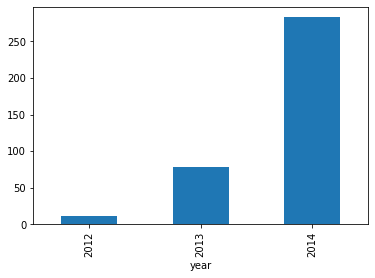

In [54]:
train.groupby('year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

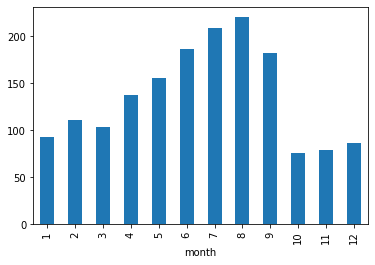

In [55]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

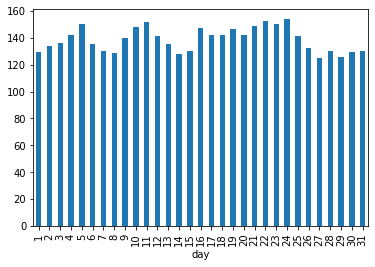

In [56]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

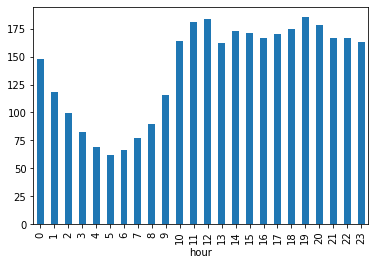

In [57]:
train.groupby('hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='year,month'>

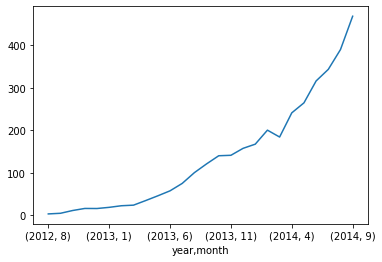

In [62]:
train.groupby(['year','month'])['Count'].mean().plot()

<AxesSubplot:xlabel='day_of_week'>

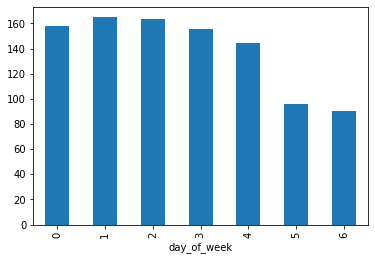

In [63]:
train.groupby('day_of_week')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

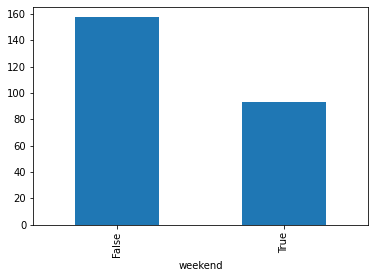

In [64]:
train.groupby('weekend')['Count'].mean().plot.bar()